## Data Preprocessing and EDA

### Importing libraries

In [10]:
import pandas as pd
import re 
from wordcloud import WordCloud

import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords 
import string
from nltk.stem import WordNetLemmatizer
import matplotlib.pyplot as plt
import seaborn as sns

nltk.download('punkt')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\sophia.bouchama\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\sophia.bouchama\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\sophia.bouchama\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [11]:
# Read in file
reviews_data = pd.read_csv("../data/Reviews.csv")

In [12]:
# Inspect first few rows
reviews_data.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [13]:
# Check size of dataset
reviews_data.shape

(568454, 10)

In [14]:
# Inspect columns
reviews_data.columns

Index(['Id', 'ProductId', 'UserId', 'ProfileName', 'HelpfulnessNumerator',
       'HelpfulnessDenominator', 'Score', 'Time', 'Summary', 'Text'],
      dtype='object')

In [15]:
# Check for null columns
reviews_data.isna().sum()

Id                         0
ProductId                  0
UserId                     0
ProfileName               26
HelpfulnessNumerator       0
HelpfulnessDenominator     0
Score                      0
Time                       0
Summary                   27
Text                       0
dtype: int64

In [16]:
# Ensure text column doesn't contain null values or empty strings
(reviews_data['Text'].isna() | (reviews_data['Text']  == '')).value_counts()


Text
False    568454
Name: count, dtype: int64

### Dealing with Duplicated Data

In [28]:
# Counting duplicated Text and User ID
reviews_data.duplicated(subset=['Text', 'UserId']).value_counts()

False    393606
True        286
Name: count, dtype: int64

In [29]:
# Counting duplicated Text and Time
reviews_data.duplicated(subset=['Text', 'UserId', 'Time']).value_counts()

False    393892
Name: count, dtype: int64

In [30]:
# Counting duplicated Text and Time
reviews_data.duplicated(subset=['Text', 'Time']).value_counts()

False    393885
True          7
Name: count, dtype: int64

In [38]:
#reviews_data[reviews_data.duplicated(subset=['Text', 'Time'], keep=False)]

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,IsDuplicate
83013,83014,B007TGDXNO,#oc-R30QU6O45MNX74,pkw99,1,5,1,1329955200,Poor substitute,Save yourself from trying these k-cups - not a...,True
92353,92354,B007TGDXMK,A249KQVDWW1DXY,pkw99,0,4,1,1329955200,Poor substitute,Save yourself from trying these k-cups - not a...,True
97471,97472,B006W5WDS4,A3JGZKXYG0XA4R,The Kelly Family,3,4,1,1347062400,Boycott Kelloggs,I no longer will buy anything Kelloggs makes b...,True
97472,97473,B006W5WDS4,A31I7JTKSVW5ER,"Inge Scott ""Ingebird""",7,10,1,1347062400,Disappointed with Kelloggs,I no longer will buy anything Kelloggs makes b...,True
507061,507062,B007PI94ZM,A19AQ9XD92OIHC,"K. Anderson ""justme""",0,0,2,1340323200,"Tolerable/okay, but not great",I think the chocolate chip cookie mix just rea...,False
507062,507063,B007PI94ZM,A3SBMACZ2DPJ2F,"Karl Backus ""kand""",0,0,2,1340323200,"okay, but really not great",I think the chocolate chip cookie mix just rea...,False
559003,559004,B000REI2X6,A303DCGBUDXAPG,Kathleen Heidenreich,0,1,5,1181865600,Love the big bag of flops!,I love the huge bags of mixed jelly bellies. ...,False
559004,559005,B000REI2X6,A2T7DN79HVFAYL,Kathy Heidenreich,0,1,5,1181865600,Love the big bag of flops!,I love the huge bags of mixed jelly bellies. ...,False
563247,563248,B007JFMH8M,A2YEO8R7AA0G1Y,give a try,0,0,5,1342137600,Yummy ;0),I loved the quaker soft baked oatmeal cookie t...,False
563248,563249,B007JFMH8M,AOR6RZIEAS241,pascale,0,0,5,1342137600,quaker soft baked cookie,I loved the quaker soft baked oatmeal cookie t...,False


In [32]:
# Counting duplicated Text, User ID, ProductId, Time 
reviews_data.duplicated(subset=['Text', 'UserId', 'ProductId']).value_counts()

False    393876
True         16
Name: count, dtype: int64

In [33]:
# Counting duplicated Text and User ID
reviews_data.duplicated(subset=['Text', 'UserId', 'ProductId', 'Time']).value_counts()

False    393892
Name: count, dtype: int64

In [23]:
# Mark all duplicates (including the first occurrence)
reviews_data['IsDuplicate'] = reviews_data.duplicated(subset=['Text', 'UserId'], keep=False)


In [39]:
# Group by UserId and count the number of duplicates for each user
duplicate_counts_by_user = reviews_data[reviews_data['IsDuplicate']].groupby('UserId').size()

# Sort the counts to see users with the most duplicates
duplicate_counts_by_user_sorted = duplicate_counts_by_user.sort_values(ascending=False)

# Display the top users with the most duplicate reviews
print(duplicate_counts_by_user_sorted.head(10))


UserId
A1YUL9PCJR3JTY    86
A3OXHLG6DIBRW8    78
A281NPSIMI1C2R    59
A3D6TFYRMIV3ZL    38
A3OGYXV9S7MJHM    34
A3FKGKUCI3DG9U    32
A29P51TN9KKMU9    32
A2SZLNSI5KOQJT    27
A1TMAVN4CEM8U8    25
A1UQBFCERIP7VJ    25
dtype: int64


In [40]:
reviews_data[reviews_data['UserId'] == 'A1YUL9PCJR3JTY'].sort_values(by='ProductId').head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,IsDuplicate
67141,67142,B0000CGFSC,A1YUL9PCJR3JTY,"O. Brown ""Ms. O. Khannah-Brown""",1,1,5,1170374400,"Distinctive, great-flavored Japanese tea",*****<br />Ashby's Japanese Green Tea is a dis...,True
375937,375938,B0000DBN1L,A1YUL9PCJR3JTY,"O. Brown ""Ms. O. Khannah-Brown""",15,16,4,1158192000,Enjoyable Chai Experience,****<br /><br />Tazo's Chai Black Tea is an en...,True
438049,438050,B0000DBN2F,A1YUL9PCJR3JTY,"O. Brown ""Ms. O. Khannah-Brown""",2,2,4,1158105600,"Hibiscus Treat, Fine Tea",****<br /><br />Tazo's Passion Herbal Infusion...,False
438096,438097,B0000DBN2I,A1YUL9PCJR3JTY,"O. Brown ""Ms. O. Khannah-Brown""",4,5,4,1158192000,Basic Orange Herb Tea,****<br /><br />Tazo's Wild Sweet Orange Herba...,True
438084,438085,B0000DBN2K,A1YUL9PCJR3JTY,"O. Brown ""Ms. O. Khannah-Brown""",1,1,4,1158278400,"Mild, Relaxed Green Tea",****<br /><br />Tazo's Zen Green Tea has a sub...,False


In [41]:
reviews_data = reviews_data.drop_duplicates(subset=["UserId","Time","Text"])

In [42]:
reviews_data.shape

(393892, 11)

<Axes: xlabel='Score', ylabel='count'>

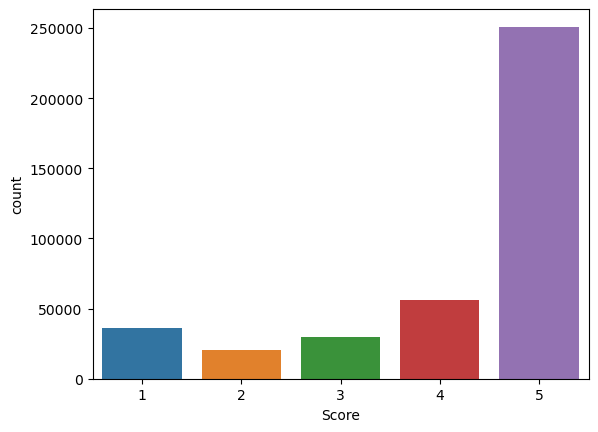

In [43]:
# Plot the distribution of Score
sns.countplot(x="Score", data=reviews_data)

<Axes: xlabel='HelpfulnessNumerator', ylabel='count'>

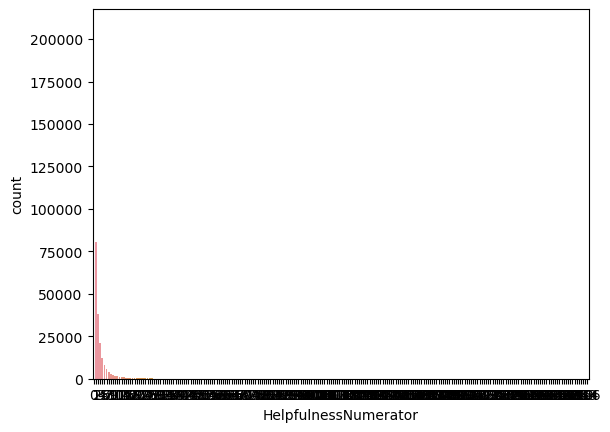

In [44]:
# Plot the distribution of HelpfulnessNumerator
sns.countplot(x="HelpfulnessNumerator", data=reviews_data)

<Axes: >

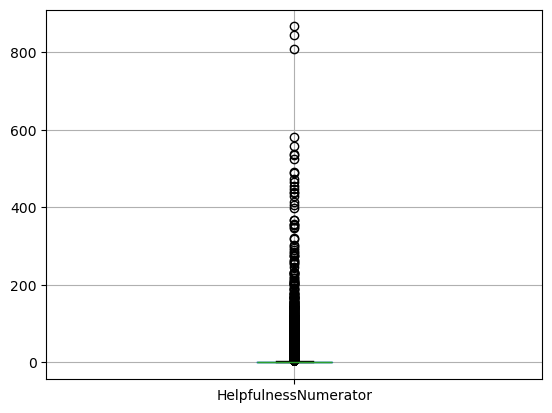

In [45]:
reviews_data.boxplot('HelpfulnessNumerator')

<Axes: xlabel='HelpfulnessDenominator', ylabel='count'>

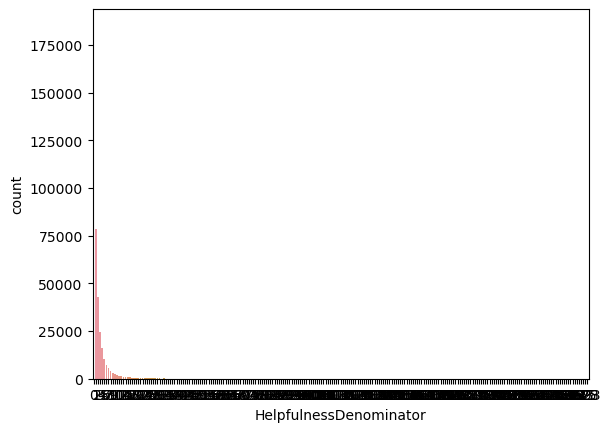

In [46]:
# Plot the distribution of HelpfulnessDenominator
sns.countplot(x="HelpfulnessDenominator", data=reviews_data)

<Axes: xlabel='HelpfulnessDenominator'>

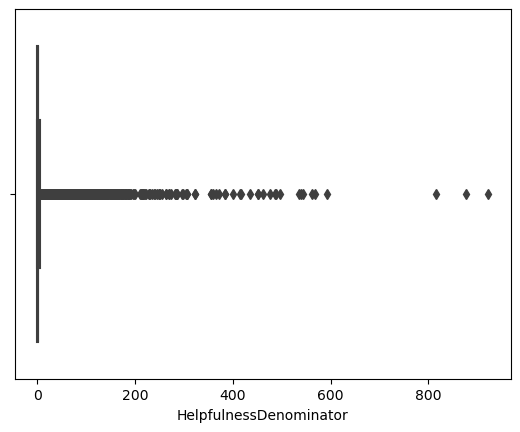

In [47]:
sns.boxplot(x="HelpfulnessDenominator", data=reviews_data)

In [48]:
# HelpfulnessDenominator should be greater than or equal to HelpfulnessNumerator. Remove those that do not satisfy this condition 
reviews_data = reviews_data[reviews_data["HelpfulnessNumerator"] <= reviews_data["HelpfulnessDenominator"]]

In [49]:
# Recheck the count
reviews_data.shape

(393890, 11)

In [50]:
# Check the datatypes of the columns
reviews_data.dtypes

Id                         int64
ProductId                 object
UserId                    object
ProfileName               object
HelpfulnessNumerator       int64
HelpfulnessDenominator     int64
Score                      int64
Time                       int64
Summary                   object
Text                      object
IsDuplicate                 bool
dtype: object

In [51]:
# Convert the Time column into datetime format
reviews_data['Time'] = pd.to_datetime(reviews_data['Time'], unit='s')

In [52]:
# Inspect the Time column values
reviews_data['Time'].head()

0   2011-04-27
1   2012-09-07
2   2008-08-18
3   2011-06-13
4   2012-10-21
Name: Time, dtype: datetime64[ns]

In [53]:
# Create a Month column from the Time data
reviews_data['Month'] = reviews_data['Time'].dt.month

# Create a Year column from the Time data
reviews_data['Year'] = reviews_data['Time'].dt.year

# Create a YearMonth column from the Time data
reviews_data['YearMonth'] = reviews_data['Time'].dt.to_period('M')  # This creates a period for each month of each year


c:\Users\sophia.bouchama\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\sophia.bouchama\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


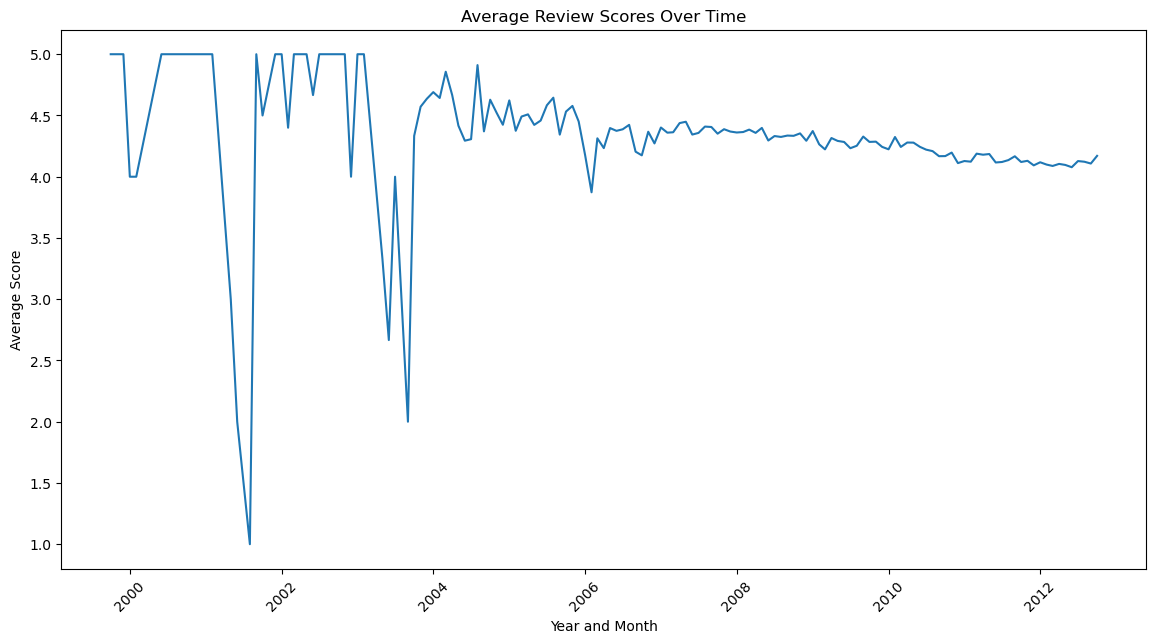

In [54]:
# Plot the Average Review Scores Over Time
average_scores = reviews_data.groupby('YearMonth')['Score'].mean().reset_index()
average_scores['YearMonth'] = average_scores['YearMonth'].dt.to_timestamp()

# Now plotting with Seaborn should work
plt.figure(figsize=(14, 7))
sns.lineplot(data=average_scores, x='YearMonth', y='Score')
plt.xticks(rotation=45)
plt.title('Average Review Scores Over Time')
plt.xlabel('Year and Month')
plt.ylabel('Average Score')
plt.show()

c:\Users\sophia.bouchama\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\sophia.bouchama\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


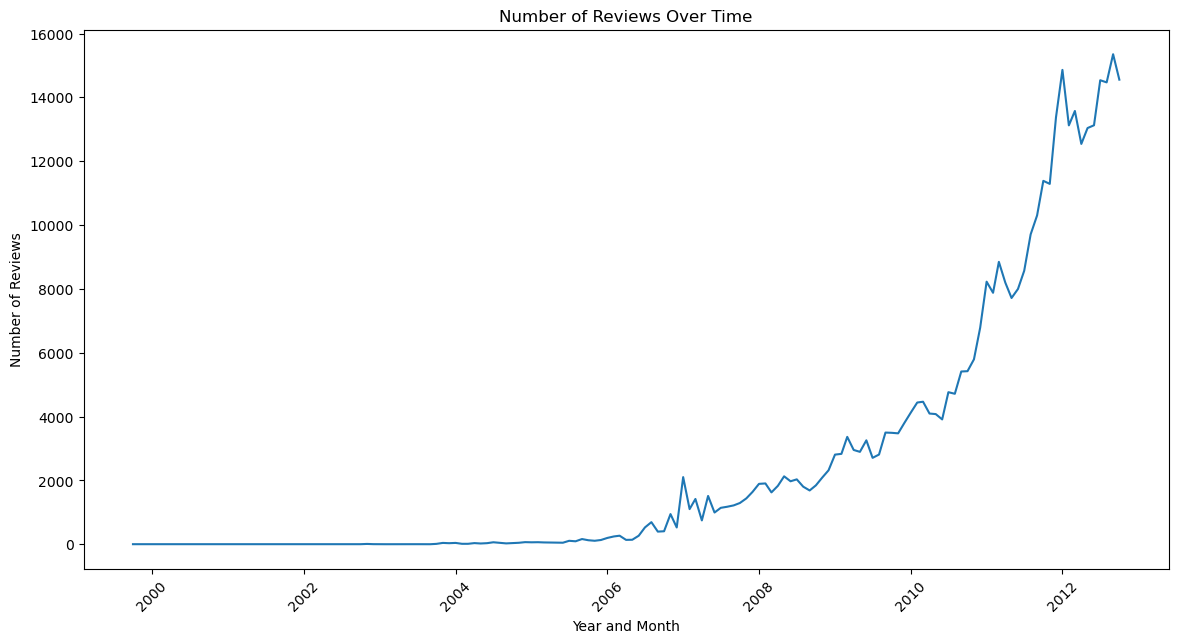

In [55]:
# Plot the Number of Reviews Over Time
review_counts = reviews_data.groupby('YearMonth').size().reset_index(name='ReviewCount')
review_counts['YearMonth'] = review_counts['YearMonth'].dt.to_timestamp()

# Plotting with Seaborn
plt.figure(figsize=(14, 7))
sns.lineplot(data=review_counts, x='YearMonth', y='ReviewCount')
plt.xticks(rotation=45)
plt.title('Number of Reviews Over Time')
plt.xlabel('Year and Month')
plt.ylabel('Number of Reviews')
plt.show()



In [56]:
# Create columns for Positive, Negative and Neutral Reviews based on Score
reviews_data['PositiveReviews'] = reviews_data['Score'] > 3
reviews_data['NegativeReviews'] = reviews_data['Score'] < 3
reviews_data['NeutralReviews'] = reviews_data['Score'] == 3

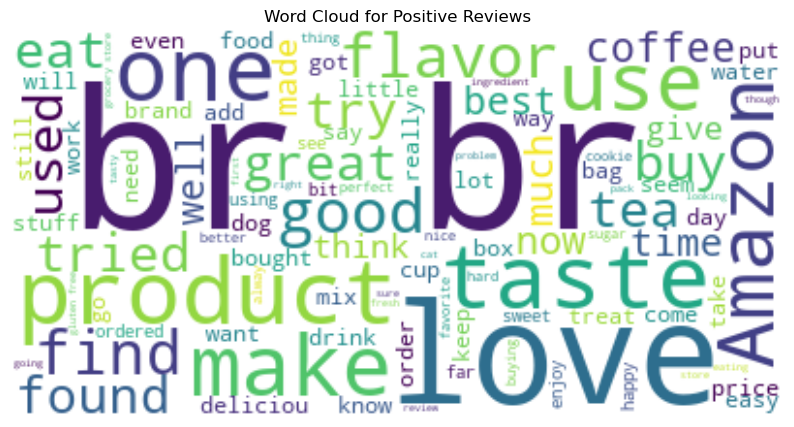

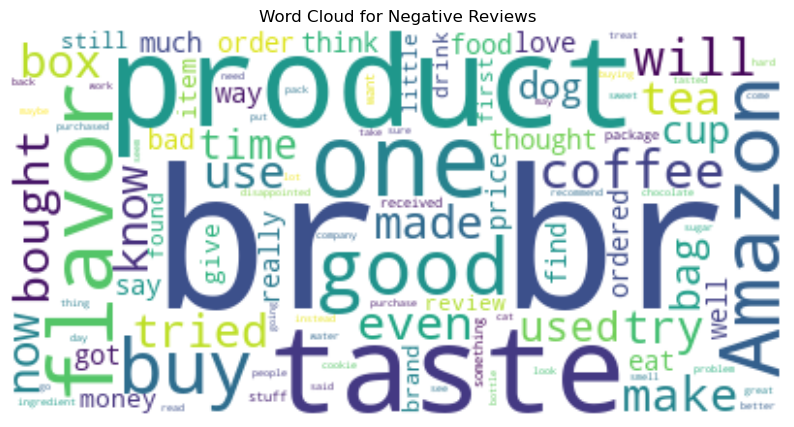

In [57]:
# Generate a wordcloud for positive and negative reviews

# Filter the reviews based on the boolean columns and join them into a single string for word cloud generation.
positive_reviews_text = " ".join(reviews_data[reviews_data['PositiveReviews']]['Text'])
negative_reviews_text = " ".join(reviews_data[reviews_data['NegativeReviews']]['Text'])

# Generate a word cloud image for positive reviews.
wordcloud_pos = WordCloud(max_font_size=100, max_words=100, background_color="white").generate(positive_reviews_text)

# Display the generated image for positive reviews.
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud_pos, interpolation='bilinear')
plt.axis("off")
plt.title('Word Cloud for Positive Reviews')
plt.show()

# Generate a word cloud image for negative reviews.
wordcloud_neg = WordCloud(max_font_size=100, max_words=100, background_color="white").generate(negative_reviews_text)

# Display the generated image for negative reviews.
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud_neg, interpolation='bilinear')
plt.axis("off")
plt.title('Word Cloud for Negative Reviews')
plt.show()


c:\Users\sophia.bouchama\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


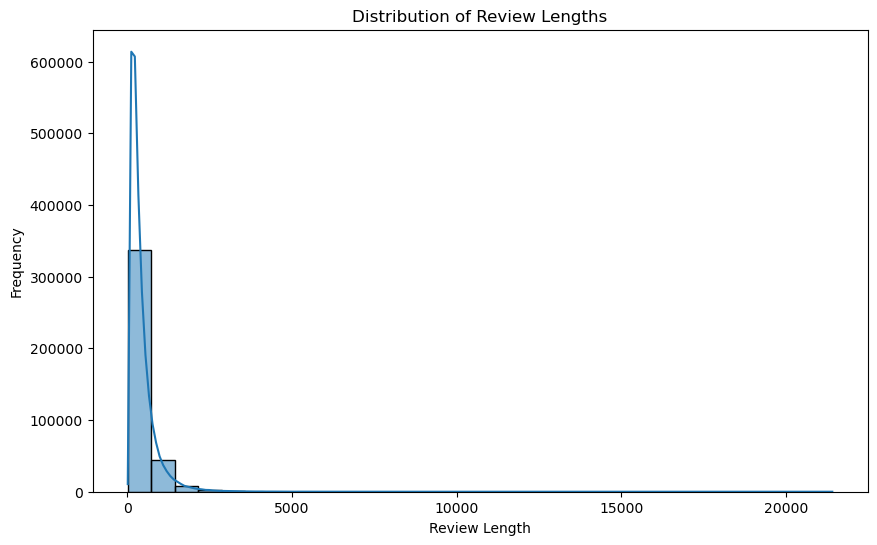

In [58]:
# Calculate review lengths
reviews_data['ReviewLength'] = reviews_data['Text'].apply(len)

# Histogram for Review Lengths
plt.figure(figsize=(10, 6))
sns.histplot(data=reviews_data, x='ReviewLength', bins=30, kde=True)
plt.title('Distribution of Review Lengths')
plt.xlabel('Review Length')
plt.ylabel('Frequency')
plt.show()



In [59]:
# Create a preprocessing function with optional steps
def preprocessing(sentence, remove_html=True, lowercasing=True, remove_numbers=True, remove_punctuation=True, tokenize=True, remove_stopwords=True, lemmatize=True):

    # Removing whitespaces
    sentence = sentence.strip()

    # Removing HTML tags
    if remove_html:
        sentence = re.sub(r'<.*?>', '', sentence)

    # Lowercasing
    if lowercasing:
        sentence = sentence.lower()

    # Removing numbers
    if remove_numbers:
        sentence = ''.join(char for char in sentence if not char.isdigit())

    # Removing punctuation
    if remove_punctuation:
        for punctuation in string.punctuation:
            sentence = sentence.replace(punctuation, '')

    # Tokenizing
    if tokenize:    
        sentence = word_tokenize(sentence)

    # Removing stopwords
    if remove_stopwords and tokenize:
        stop_words = set(stopwords.words('english'))
        sentence = [word for word in sentence if word not in stop_words]

    # Lemmatizing
    if lemmatize and tokenize:
        lemmatizer = WordNetLemmatizer()
        lemmatized = [lemmatizer.lemmatize(word) for word in sentence]
        sentence = " ".join(lemmatized)

    return sentence   

In [60]:
reviews_data.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,IsDuplicate,Month,Year,YearMonth,PositiveReviews,NegativeReviews,NeutralReviews,ReviewLength
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,2011-04-27,Good Quality Dog Food,I have bought several of the Vitality canned d...,False,4,2011,2011-04,True,False,False,263
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,2012-09-07,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,False,9,2012,2012-09,False,True,False,190
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,2008-08-18,"""Delight"" says it all",This is a confection that has been around a fe...,False,8,2008,2008-08,True,False,False,509
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,2011-06-13,Cough Medicine,If you are looking for the secret ingredient i...,True,6,2011,2011-06,False,True,False,219
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,2012-10-21,Great taffy,Great taffy at a great price. There was a wid...,False,10,2012,2012-10,True,False,False,140
